In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # dient zur Bilder-Labellisation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2  # für opencv
import os


In [2]:
img=image.load_img(r"C:\Users\xrlab\bwSyncShare\Uni\VdKI\Phyton\train\Dosenoeffner/21.jpg")

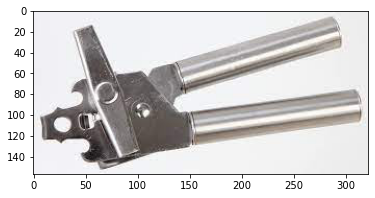

In [3]:
plt.imshow(img)

In [4]:
cv2.imread(r"C:\Users\xrlab\bwSyncShare\Uni\VdKI\Phyton\train\Dosenoeffner/21.jpg")

array([[[245, 240, 241],
        [245, 240, 241],
        [245, 240, 241],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[245, 240, 241],
        [245, 240, 241],
        [245, 240, 241],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[245, 240, 241],
        [245, 240, 241],
        [245, 240, 241],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       ...,

       [[247, 242, 243],
        [247, 242, 243],
        [247, 242, 243],
        ...,
        [236, 236, 236],
        [234, 236, 236],
        [234, 236, 236]],

       [[247, 242, 243],
        [247, 242, 243],
        [247, 242, 243],
        ...,
        [236, 236, 236],
        [234, 236, 236],
        [234, 236, 236]],

       [[247, 242, 243],
        [247, 242, 243],
        [247, 242, 243],
        ...,
        [236, 236, 236],
        [234, 236, 236],
        [234, 236, 236]]

In [5]:
cv2.imread(r"C:\Users\xrlab\bwSyncShare\Uni\VdKI\Phyton\train\Dosenoeffner/21.jpg").shape

(157, 322, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [15]:
train_dataset=train.flow_from_directory('train\Dosenoeffner',
                                       target_size=(28,28),
                                       batch_size=3,
                                       class_mode='sparse')
valid_dataset=train.flow_from_directory('valid\Dosenoeffner',
                                       target_size=(28,28),
                                       batch_size=3,
                                       class_mode='sparse')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [8]:
train_dataset.classes

array([], dtype=int32)

In [9]:
train_dataset.class_indices

{}

In [10]:
valid_dataset.class_indices

{}

Model Definition

In [11]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(28,28,3)), 
                                  # Anzahl Filters, Side of Filters,
                                 tf.keras.layers.MaxPool2D(2,2), #  Size of MaxPoolingLayer; max of ?? pixels
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),    
                                 # Increase number of filters/Channels??
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2), 
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(512,activation='relu'), 
                                 tf.keras.layers.Dense(1,activation='softmax')          
                                 # Activation in last Dense: Softmax, Sigmoide if only 2 Classes
                                 ]) 
                                
                                   

In [12]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy']) 
                          # other optimizer possible ?? learning rate statt lr
    
    

In [13]:
model_fit=model.fit(train_dataset,
                    epochs=10,
                    validation_data=valid_dataset)  # less number of step (can rise it), epoch: how many 
                                                                #iterations, call, Option called in video 
                                                                # callback function: stop iterations once accuracy 0.9

ValueError: Asked to retrieve element 0, but the Sequence has length 0

Müssen die Klasse die gleiche Dim haben ?